# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Membaca dataset clustering dan menampilkan 5 baris pertama
df = pd.read_csv('dataset_clustering.csv')  # Membaca dataset dari file CSV
df.head() # Menampilkan 5 baris pertama dari dataset    

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


Dari hasil output df.info(), kita dapat melihat bahwa dataset ini terdiri atas 4620 baris dan 5 kolom. Berikut adalah detail dari setiap kolom.

provinsi : Ini berisi nama provinsi, bertipe data object (kategori).
daerah : Ini menunjukkan tipe daerah, bertipe data object (kategori).
jenis : Ini menampilkan jenis makanan, bertipe data object (kategori).
tahun : Ini berisi data yang diinput pada tahun tersebut, bertipe data int64.
peng: Ini menunjukkan jumlah pengeluaran, bertipe data float64.

In [4]:
# Mengganti nama kolom peng untuk memudahkan pemrosesan
df.rename(columns={'peng': 'pengeluaran'}, inplace=True)  # Mengganti nama kolom 'peng' menjadi 'pengeluaran'
df.head()  # Menampilkan 5 baris pertama dari dataset setelah penggantian nama kolom


,provinsi,daerah,jenis,tahun,pengeluaran
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [5]:
# Mengecek missing values dalam dataset
df.isnull().sum()  # Menampilkan jumlah nilai yang hilang (missing values) dalam setiap kolom

provinsi         0
daerah           0
jenis            0
tahun            0
pengeluaran    108
dtype: int64

Berdasarkan hasil di atas, terdapat missing values pada kolom pengeluaran

In [6]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,tahun,pengeluaran
count,4620.000000,4.512000e+03
mean,2015.045455,6.012012e+05
std,4.416124,3.524052e+05
min,2007.000000,5.921600e+04
25%,2011.750000,3.476272e+05
50%,2015.000000,5.206945e+05
75%,2019.000000,7.577325e+05
max,2022.000000,2.525347e+06


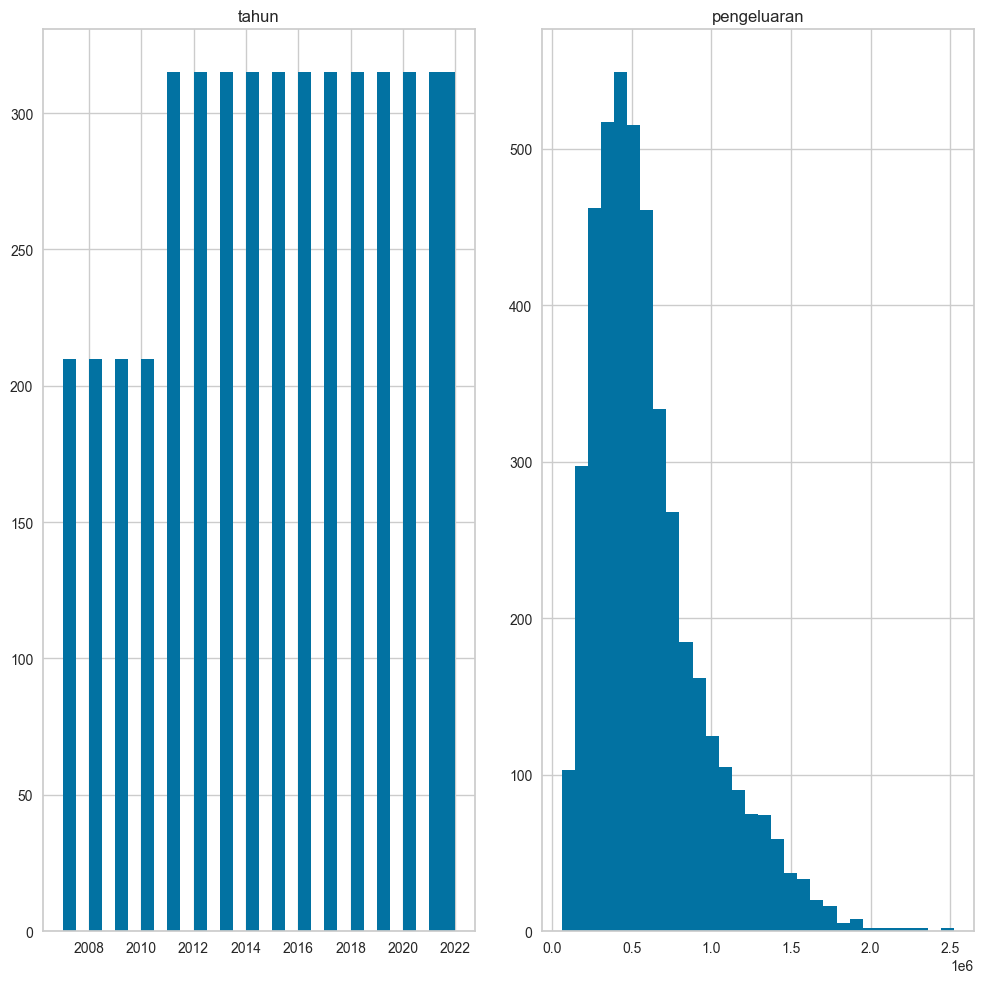

In [7]:
# Menampilkan visualisasi distribusi data untuk setiap kolom numerik dalam dataset
df.hist(figsize=(10, 10), bins=30)  # Membuat histogram untuk setiap kolom numerik
plt.tight_layout()  # Mengatur tata letak agar tidak ada yang terpotong
plt.show()  # Menampilkan histogram

Jika diperhatikan, kolom 'pengeluaran' memiliki distribusi yang miring ke kanan (right-skewed). Untuk mengatasi hal ini, kita akan melakukan transformasi logaritmik pada kolom tersebut. Transformasi logaritmik dapat membantu mengurangi skewness dan membuat data lebih mendekati distribusi normal.

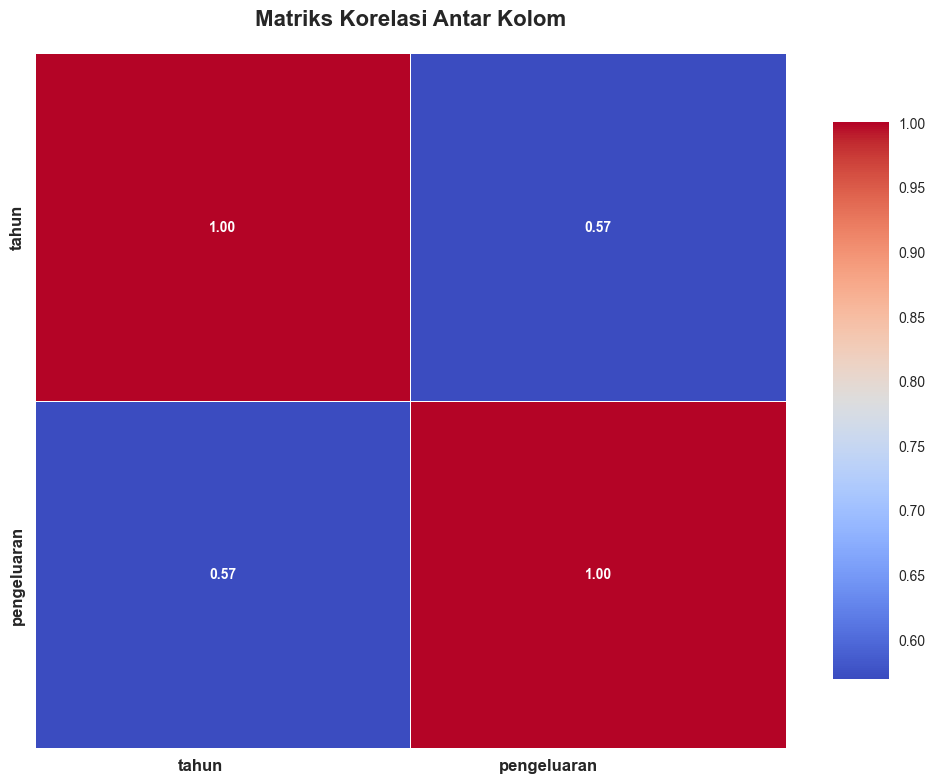

In [8]:
# Menampilkan heatmap untuk melihat korelasi antar fitur dalam dataset
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.5,
    annot_kws={'size': 10, 'weight': 'bold'},  
    cbar_kws={'shrink': 0.8, 'aspect': 10}, 
)

plt.title("Matriks Korelasi Antar Kolom", fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, ha='right', weight='bold')
plt.yticks(fontsize=12, weight='bold')

plt.tight_layout()  
plt.show()

Jika diperhatikan, korelasi antara kolom pengeluaran dan kolom tahun sebesar 0,57, yang menunjukkan adanya hubungan positif antara kedua kolom tersebut. Artinya, semakin tinggi pengeluaran, semakin tinggi pula tahun yang dihabiskan. Namun, hubungan ini tidak terlalu kuat, sehingga kita perlu melakukan analisis lebih lanjut untuk memahami pola dan hubungan yang lebih dalam antara kedua kolom tersebut.

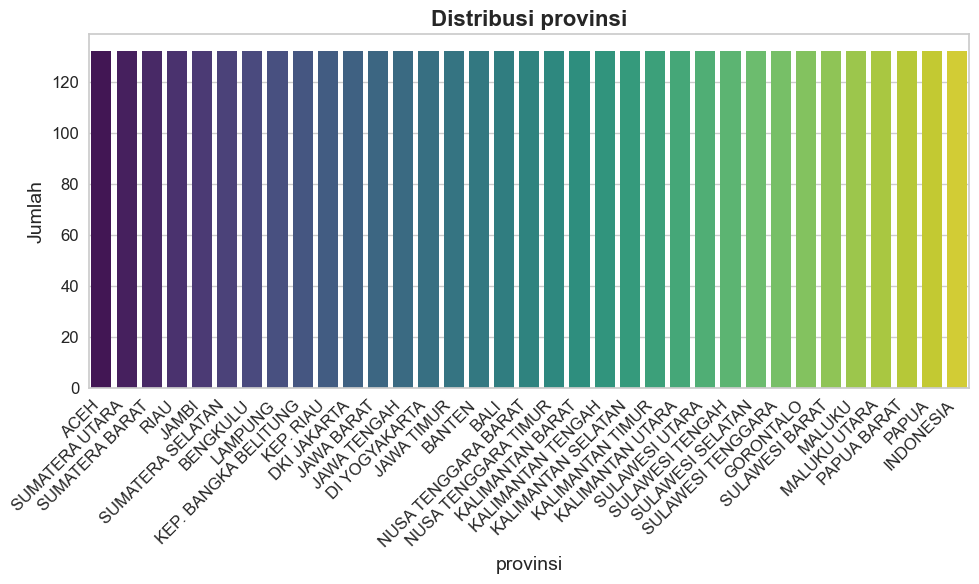

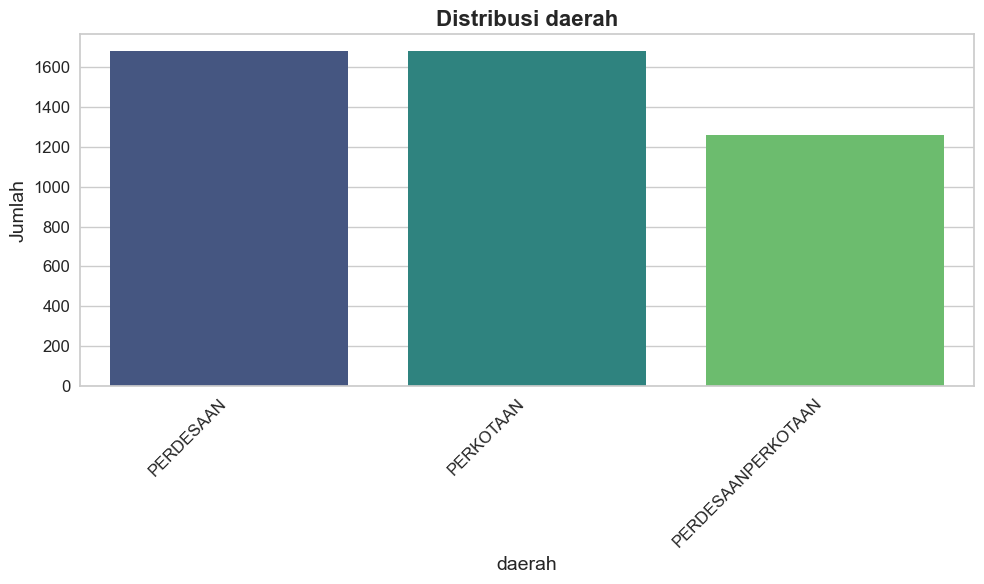

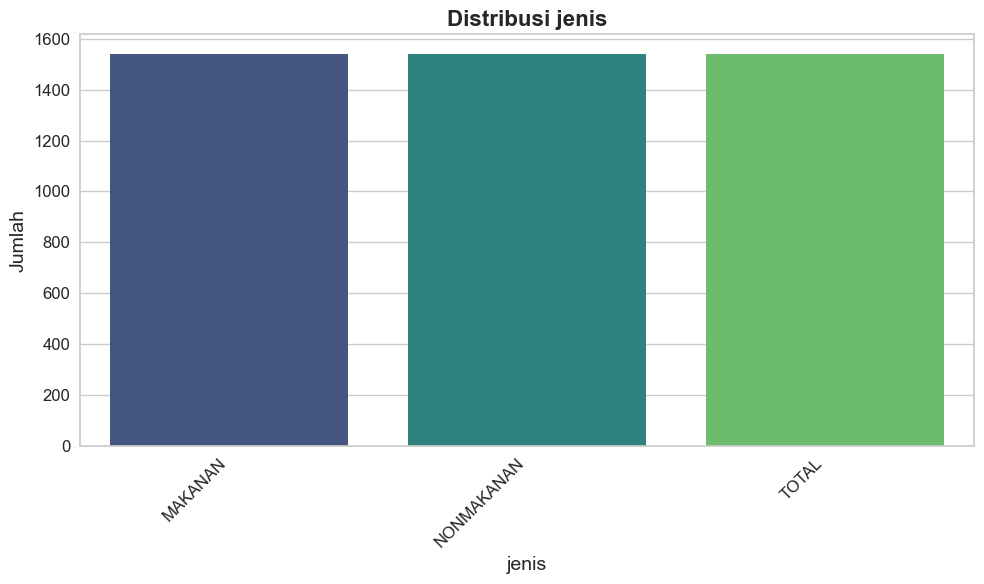

In [9]:
# Menampilkan visualisasi distribusi untuk variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  # Mengambil kolom kategorikal
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=col, palette='viridis',legend=False)
    plt.title(f'Distribusi {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

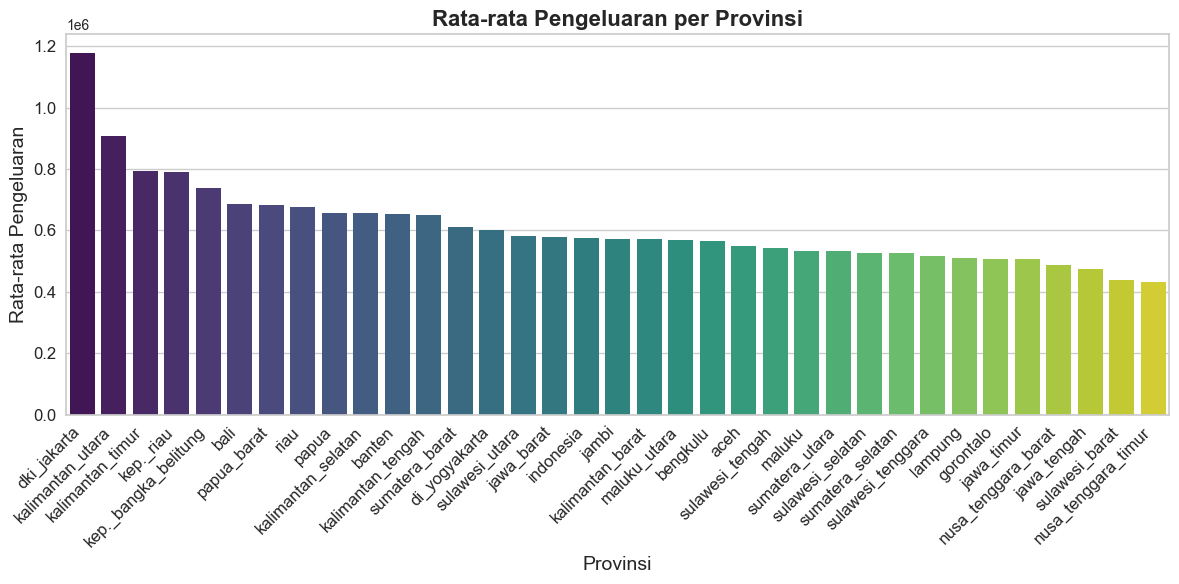

In [10]:
# Menghitung rata-rata pengeluaran berdasarkan provinsi
df['provinsi'] = df['provinsi'].str.replace(' ', '_')  # Mengganti spasi dengan underscore pada nama provinsi
df['provinsi'] = df['provinsi'].str.lower()  # Mengubah nama provinsi menjadi huruf kecil
# Menghitung rata-rata pengeluaran berdasarkan provinsi
avg_pengeluaran = df.groupby('provinsi')['pengeluaran'].mean().reset_index()  # Menghitung rata-rata pengeluaran per provinsi
avg_pengeluaran = avg_pengeluaran.sort_values(by='pengeluaran', ascending=False)  # Mengurutkan berdasarkan pengeluaran
# Menampilkan rata-rata pengeluaran per provinsi
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_pengeluaran, x='provinsi', hue='provinsi', y='pengeluaran', palette='viridis', legend=False)
plt.title('Rata-rata Pengeluaran per Provinsi', fontsize=16, fontweight='bold')
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Rata-rata Pengeluaran', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()  # Menampilkan grafik rata-rata pengeluaran per provinsi


Berdasarkan hasil di atas, kita bisa melihat bahwa terdapat beberapa provinsi yang memiliki rata-rata pengeluaran yang cukup tinggi, seperti dki_jakarta. Kita akan melakukan analisis lebih lanjut untuk mengelompokkan data berdasarkan pengeluaran dan provinsi. Kita akan menggunakan teknik clustering untuk mengidentifikasi pola dalam data ini.

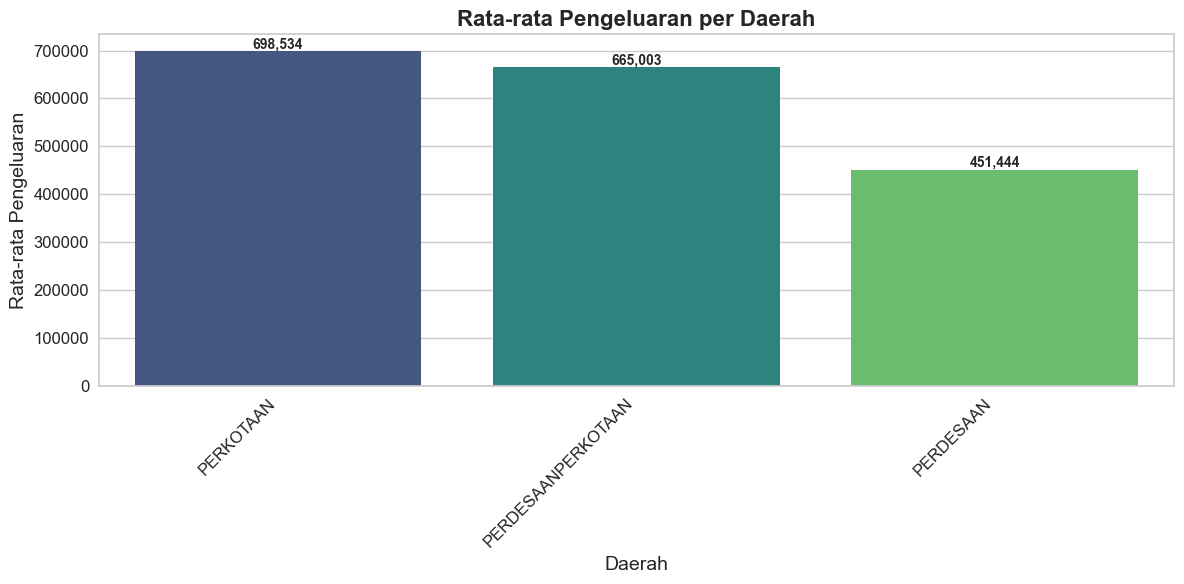

In [11]:
# Menghitung rata-rata pengeluaran berdasarkan daerah
avg_pengeluaran_daerah = df.groupby('daerah')['pengeluaran'].mean().reset_index()  # Menghitung rata-rata pengeluaran per daerah
avg_pengeluaran_daerah = avg_pengeluaran_daerah.sort_values(by='pengeluaran', ascending=False)  # Mengurutkan berdasarkan pengeluaran   
# Menampilkan rata-rata pengeluaran per daerah
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_pengeluaran_daerah, x='daerah', hue='daerah', y='pengeluaran', palette='viridis', legend=False)

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posisi x
        p.get_height(),  # Posisi y
        f'{p.get_height():,.0f}',  # Format angka
        ha='center', va='bottom', fontsize=10, fontweight='bold'  # Pengaturan teks
    )

plt.title('Rata-rata Pengeluaran per Daerah', fontsize=16, fontweight='bold')
plt.xlabel('Daerah', fontsize=14)
plt.ylabel('Rata-rata Pengeluaran', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()  # Menampilkan grafik rata-rata pengeluaran per daerah

Berdasarkan hasil diatas, kita bisa melihat bahwa daerah perkotaan memiliki rata-rata pengeluaran yang lebih tinggi dibandingkan dengan daerah lainnya. Hal ini menunjukkan bahwa masyarakat di daerah perkotaan cenderung memiliki pengeluaran yang lebih besar dibandingkan dengan masyarakat di daerah pedesaan. Selain itu, kita juga bisa melihat bahwa ada beberapa provinsi yang memiliki rata-rata pengeluaran yang sangat tinggi, seperti DKI Jakarta dan Jawa Barat. Hal ini menunjukkan bahwa masyarakat di provinsi tersebut cenderung memiliki daya beli yang lebih tinggi dibandingkan dengan provinsi lainnya.

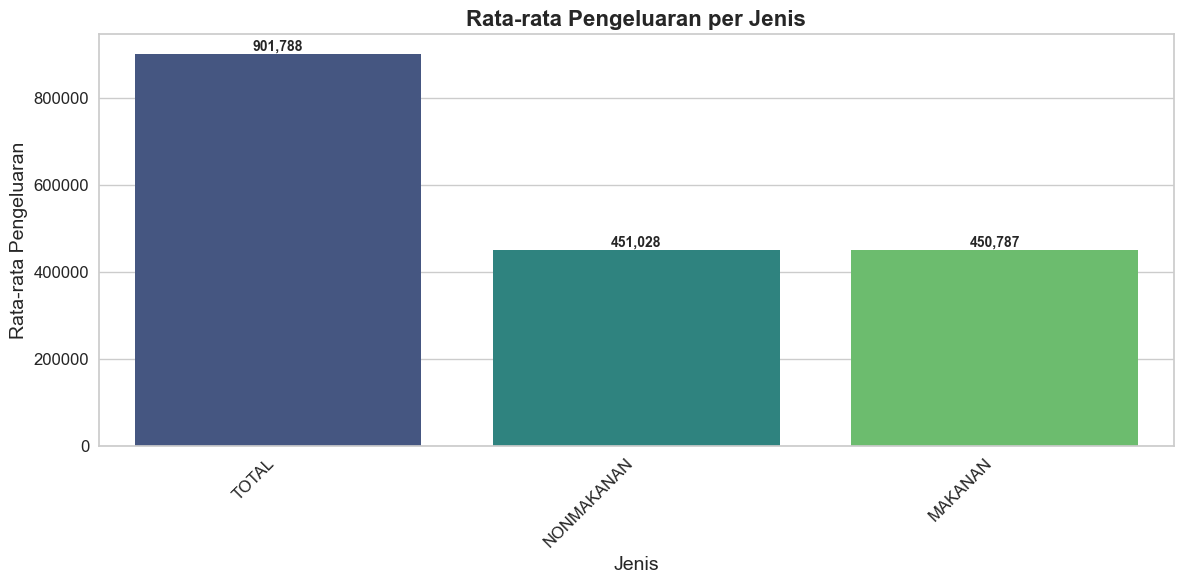

In [12]:
# Menghitung rata-rata pengeluaran berdasarkan jenis
avg_pengeluaran_jenis = df.groupby('jenis')['pengeluaran'].mean().reset_index()  # Menghitung rata-rata pengeluaran per jenis
avg_pengeluaran_jenis = avg_pengeluaran_jenis.sort_values(by='pengeluaran', ascending=False)  # Mengurutkan berdasarkan pengeluaran

# Menampilkan rata-rata pengeluaran per jenis
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_pengeluaran_jenis, x='jenis', hue='jenis', y='pengeluaran', palette='viridis', legend=False)

# Menambahkan angka di atas bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Posisi x
        p.get_height(),  # Posisi y
        f'{p.get_height():,.0f}',  # Format angka
        ha='center', va='bottom', fontsize=10, fontweight='bold'  # Pengaturan teks
    )

plt.title('Rata-rata Pengeluaran per Jenis', fontsize=16, fontweight='bold')
plt.xlabel('Jenis', fontsize=14)
plt.ylabel('Rata-rata Pengeluaran', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()  # Menampilkan grafik rata-rata pengeluaran per jenis

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
print(df['provinsi'].unique())  # Menampilkan daftar unik provinsi

['aceh' 'sumatera_utara' 'sumatera_barat' 'riau' 'jambi'
 'sumatera_selatan' 'bengkulu' 'lampung' 'kep._bangka_belitung'
 'kep._riau' 'dki_jakarta' 'jawa_barat' 'jawa_tengah' 'di_yogyakarta'
 'jawa_timur' 'banten' 'bali' 'nusa_tenggara_barat' 'nusa_tenggara_timur'
 'kalimantan_barat' 'kalimantan_tengah' 'kalimantan_selatan'
 'kalimantan_timur' 'kalimantan_utara' 'sulawesi_utara' 'sulawesi_tengah'
 'sulawesi_selatan' 'sulawesi_tenggara' 'gorontalo' 'sulawesi_barat'
 'maluku' 'maluku_utara' 'papua_barat' 'papua' 'indonesia']


In [14]:
# Menghapus data indonesia pada tabel provinsi yang tidak diperlukan
df = df[~df['provinsi'].isin(['indonesia'])]  # Menghapus baris yang memiliki provinsi 'indonesia'


In [15]:
# Menampilkan dataframe untuk analisis lebih lanjut
df.head(10)  # Menampilkan 10 baris pertama dari dataset

,provinsi,daerah,jenis,tahun,pengeluaran
0,aceh,PERDESAAN,MAKANAN,2007,195176.0
1,aceh,PERDESAAN,MAKANAN,2008,218781.0
2,aceh,PERDESAAN,MAKANAN,2009,247427.0
3,aceh,PERDESAAN,MAKANAN,2010,275749.0
4,aceh,PERDESAAN,MAKANAN,2011,308000.0
5,aceh,PERDESAAN,MAKANAN,2012,326182.0
6,aceh,PERDESAAN,MAKANAN,2013,337761.0
7,aceh,PERDESAAN,MAKANAN,2014,368080.0
8,aceh,PERDESAAN,MAKANAN,2015,395136.0
9,aceh,PERDESAAN,MAKANAN,2016,412251.0


In [16]:
# Menangani data kosong pada kolom pengeluaran dengan median
df.fillna({'pengeluaran': df['pengeluaran'].median()}, inplace=True)  # Mengisi nilai kosong dengan median


In [17]:
# Mengecek kembali apakah ada nilai kosong setelah pengisian
df.isnull().sum()  # Menampilkan jumlah nilai yang hilang (missing values) dalam setiap kolom

provinsi       0
daerah         0
jenis          0
tahun          0
pengeluaran    0
dtype: int64

In [18]:
# Mengecek data duplikat dalam dataset
duplicates = df.duplicated().sum()  # Menghitung jumlah data duplikat
print(f"Jumlah data duplikat: {duplicates}")  # Menampilkan jumlah data duplikat

Jumlah data duplikat: 0


In [19]:
# Melakukan normalisasi menggunakan standard scaler
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()  # Mengambil kolom numerik
scaler = StandardScaler()  # Membuat objek StandardScaler
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])  # Melakukan normalisasi pada kolom numerik
# Menampilkan 5 baris pertama dari dataset setelah normalisasi
df.head()  # Menampilkan 5 baris pertama dari dataset setelah normalisasi

,provinsi,daerah,jenis,tahun,pengeluaran
0,aceh,PERDESAAN,MAKANAN,-1.822033,-1.159356
1,aceh,PERDESAAN,MAKANAN,-1.595566,-1.091759
2,aceh,PERDESAAN,MAKANAN,-1.369098,-1.009726
3,aceh,PERDESAAN,MAKANAN,-1.142631,-0.928621
4,aceh,PERDESAAN,MAKANAN,-0.916164,-0.836265


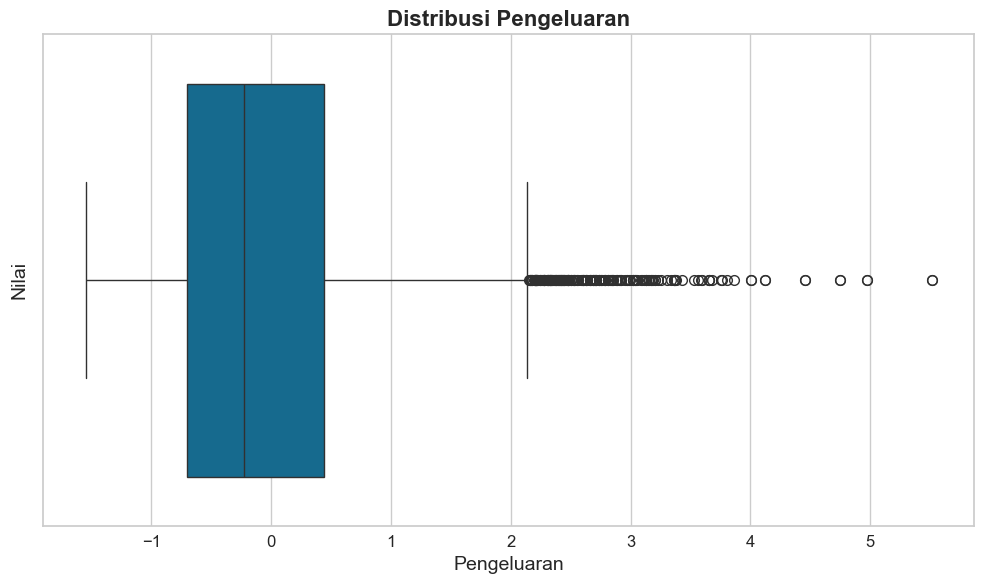

In [20]:
# Menampilkan boxplot untuk mendeteksi outlier pada kolom pengeluaran
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pengeluaran'])
plt.title('Distribusi Pengeluaran', fontsize=16, fontweight='bold')
plt.xlabel('Pengeluaran', fontsize=14)
plt.ylabel('Nilai', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()  # Menampilkan boxplot

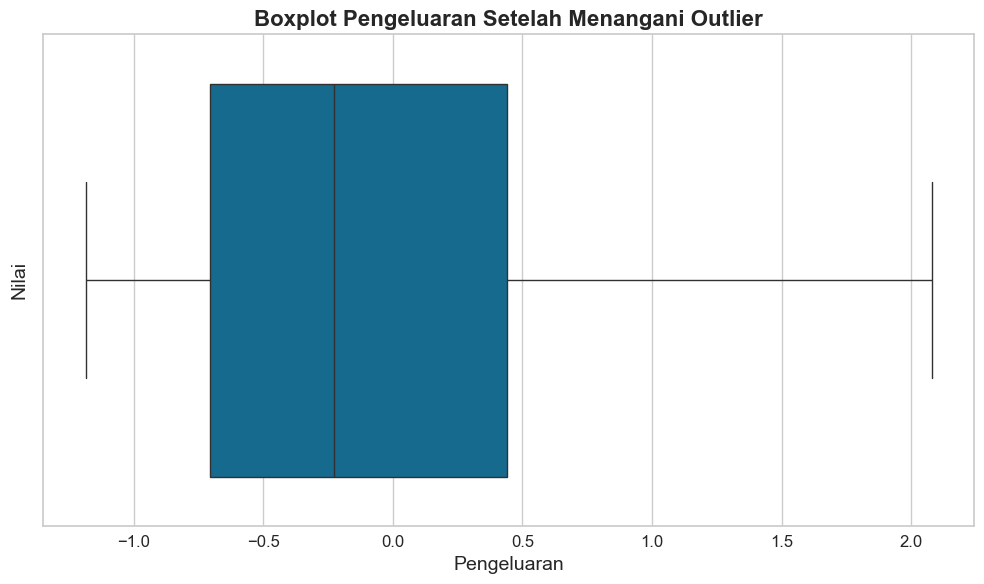

In [21]:
# Menghitung batas bawah dan batas atas untuk outlier
lower_limit = df['pengeluaran'].quantile(0.05)  # Persentil ke-5
upper_limit = df['pengeluaran'].quantile(0.95)  # Persentil ke-95

# Mengganti nilai outlier dengan batas bawah atau atas
df.loc[df['pengeluaran'] < lower_limit, 'pengeluaran'] = lower_limit
df.loc[df['pengeluaran'] > upper_limit, 'pengeluaran'] = upper_limit

# Menampilkan boxplot setelah menangani outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pengeluaran'])
plt.title('Boxplot Pengeluaran Setelah Menangani Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Pengeluaran', fontsize=14)
plt.ylabel('Nilai', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()  # Menampilkan boxplot setelah menangani outlier

In [22]:
# Inisialisasi dictionary untuk menyimpan encoder
encoders = {}  # Membuat dictionary kosong untuk menyimpan encoder label
# Melakukan label encoding pada kolom kategorikal
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df_normalized = df.copy()  # Membuat salinan dari dataframe untuk normalisasi

In [23]:
# Membuat kategori pengeluaran dengan binning
bins = [df["pengeluaran"].min(),
        df["pengeluaran"].quantile(0.25),  # Q1
        df["pengeluaran"].quantile(0.50),  # Median (Q2)
        df["pengeluaran"].quantile(0.75),  # Q3
        df["pengeluaran"].max() + 1]  # Menambahkan 1 untuk memastikan batas atas mencakup nilai maksimum

labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']  # Label untuk kategori

# Proses binning menggunakan pd.cut()
df_normalized['pengeluaran_kategori'] = pd.cut(
    df_normalized['pengeluaran'],
    bins=bins,
    labels=labels,
    right=False  # Interval [awal, akhir)
)

# Melakukan label encoding pada kolom kategori
label_encoder_kategori = LabelEncoder()
df_normalized['pengeluaran_kategori'] = label_encoder_kategori.fit_transform(df_normalized['pengeluaran_kategori'])  # Melakukan label encoding pada kolom kategori

# Menampilkan hasil binning
print("Binning pengeluaran:")
print(df_normalized[['pengeluaran', 'pengeluaran_kategori']])  # Menampilkan 10 baris pertama dari kolom pengeluaran dan kategori pengeluaran


Binning pengeluaran:
      pengeluaran  pengeluaran_kategori
0       -1.159356                     0
1       -1.091759                     0
2       -1.009726                     0
3       -0.928621                     0
4       -0.836265                     0
...           ...                   ...
4483     1.502484                     1
4484     1.760280                     1
4485     2.032318                     1
4486     2.079642                     1
4487     2.079642                     1

[4488 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [24]:
# Memilih fitur 'tahun' dan 'pengeluaran' dari dataframe df_normalized untuk clustering
X = df_normalized[['tahun', 'pengeluaran']].values

# Menampilkan dataframe dengan kolom 'tahun' dan 'pengeluaran' untuk verifikasi
print(pd.DataFrame(X, columns=['tahun', 'pengeluaran']))

# Membuat model KMeans dengan jumlah cluster 3 dan random_state untuk hasil yang konsisten
kmeans_model = KMeans(n_clusters=3, random_state=0)

# Melatih model KMeans dengan data X
kmeans_model.fit(X)

# Mendapatkan label cluster untuk setiap data
labels = kmeans_model.labels_


         tahun  pengeluaran
0    -1.822033    -1.159356
1    -1.595566    -1.091759
2    -1.369098    -1.009726
3    -1.142631    -0.928621
4    -0.916164    -0.836265
...        ...          ...
4483  0.669108     1.502484
4484  0.895576     1.760280
4485  1.122043     2.032318
4486  1.348510     2.079642
4487  1.574978     2.079642

[4488 rows x 2 columns]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score untuk k=2: 0.477
Silhouette Score untuk k=3: 0.453
Silhouette Score untuk k=4: 0.412
Silhouette Score untuk k=5: 0.364
Silhouette Score untuk k=6: 0.388
Silhouette Score untuk k=7: 0.368
Silhouette Score untuk k=8: 0.381
Silhouette Score untuk k=9: 0.380


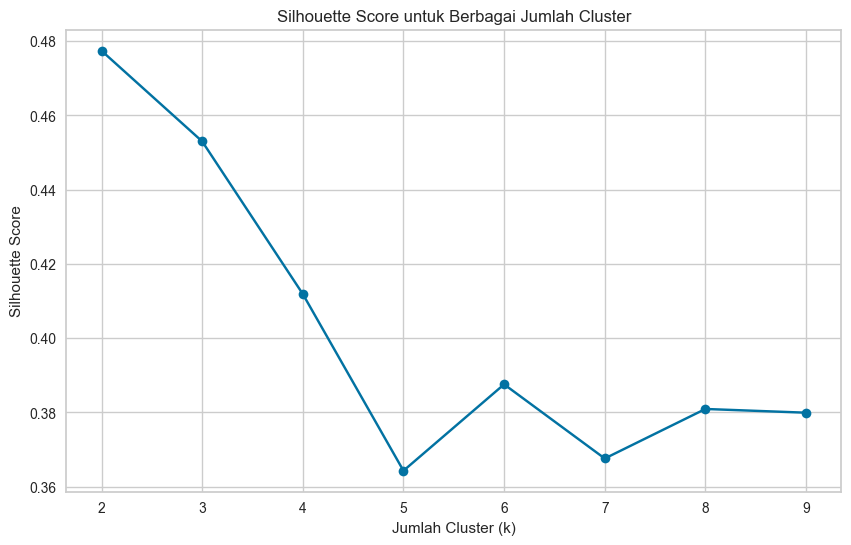

In [25]:
# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Inisialisasi variabel untuk menyimpan nilai Silhouette Score maksimum
max_silhouette_score = -float('inf')

# Iterasi untuk mencoba berbagai jumlah cluster (k) dari 2 hingga 9
for k in range(2, 10):
    # Membuat model KMeans sementara dengan jumlah cluster k
    kmeans_temp = KMeans(n_clusters=k, random_state=0)
    
    # Melatih model KMeans dan mendapatkan label cluster untuk setiap data
    labels_temp = kmeans_temp.fit_predict(X)
    
    # Menghitung Silhouette Score untuk jumlah cluster k
    score = silhouette_score(X, labels_temp)
    
    # Menyimpan nilai Silhouette Score ke dalam list
    silhouette_scores.append(score)
    
    # Menampilkan Silhouette Score untuk jumlah cluster k
    print(f"Silhouette Score untuk k={k}: {score:.3f}")
    
    # Memperbarui nilai maksimum Silhouette Score jika ditemukan nilai yang lebih tinggi
    if score > max_silhouette_score:
        max_silhouette_score = score

# Visualisasi Silhouette Score untuk berbagai jumlah cluster
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')  # Membuat plot garis dengan marker
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')  # Judul grafik
plt.xlabel('Jumlah Cluster (k)')  # Label sumbu x
plt.ylabel('Silhouette Score')  # Label sumbu y
plt.grid(True)  # Menampilkan grid pada grafik
plt.show()  # Menampilkan grafik

# Menentukan jumlah cluster optimal berdasarkan nilai maksimum Silhouette Score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2

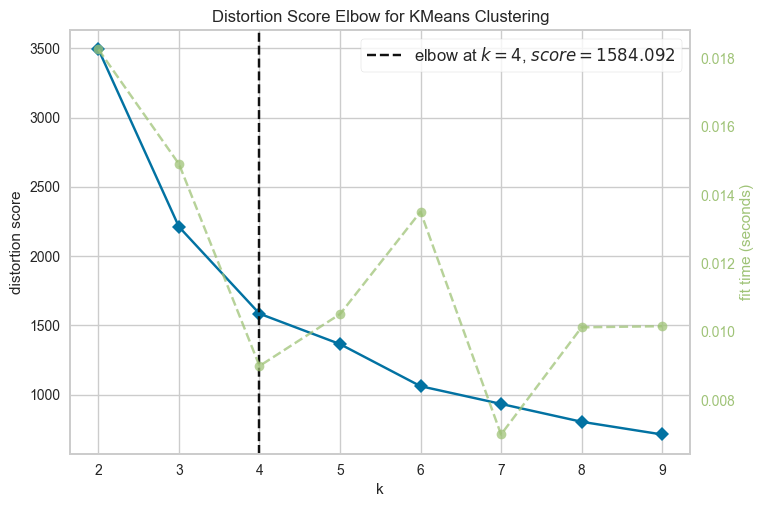

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Inisialisasi model KMeans tanpa menentukan jumlah cluster
kmeans_elbow = KMeans(random_state=0)

# Membuat visualizer untuk menentukan jumlah cluster optimal menggunakan metode Elbow
visualizer = KElbowVisualizer(
    kmeans_elbow,  # Model KMeans
    k=(2, 10)      # Rentang jumlah cluster yang akan dievaluasi
)

# Melatih visualizer dengan data X
visualizer.fit(X)

# Mendapatkan jumlah cluster optimal berdasarkan metode Elbow
optimal_k_elbow = visualizer.elbow_value_

# Menampilkan grafik Elbow untuk memvisualisasikan jumlah cluster optimal
visualizer.show()

In [27]:
# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")  # Menampilkan jumlah cluster optimal
# Menampilkan jumlah cluster optimal berdasarkan metode Elbow
print(f"Jumlah cluster optimal berdasarkan metode Elbow: {optimal_k_elbow}")  # Menampilkan jumlah cluster optimal

Jumlah cluster optimal berdasarkan Silhouette Score: 2
Jumlah cluster optimal berdasarkan metode Elbow: 4


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [28]:
# Mengambil semua fitur dari dataset yang sudah dinormalisasi
features = df_normalized.columns

# Mengonversi dataset menjadi array numpy untuk digunakan dalam PCA
X_full = df_normalized[features].values

# Inisialisasi PCA dengan jumlah komponen yang mempertahankan 95% variansi data
pca = PCA(
    n_components=0.95,  # Menentukan jumlah komponen berdasarkan proporsi variansi
    random_state=0      # Menetapkan random_state untuk hasil yang konsisten
)

# Melakukan transformasi PCA pada data
X_pca = pca.fit_transform(X_full)

# Menampilkan jumlah fitur sebelum dan sesudah PCA
print(f"\nJumlah fitur asli: {X_full.shape[1]}, setelah PCA: {X_pca.shape[1]}")


Jumlah fitur asli: 6, setelah PCA: 1


In [29]:
# Inisialisasi model KMeans dengan jumlah cluster optimal berdasarkan Elbow Method
kmeans_pca = KMeans(
    n_clusters=optimal_k_elbow,
    random_state=0
)

kmeans_pca.fit(X_pca)

labels_pca = kmeans_pca.labels_

In [30]:
# Menghitung Silhouette Score untuk model dengan data hasil PCA
# Silhouette Score digunakan untuk mengevaluasi kualitas clustering berdasarkan data hasil PCA
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score dengan feature selection (PCA): {score_pca:.3f}")

# Membandingkan dengan performa model asli (tanpa PCA)
# Menggunakan nilai maksimum Silhouette Score dari model asli untuk perbandingan
score_original = max_silhouette_score  # Silhouette Score model asli
print(f"Silhouette Score model asli: {score_original:.3f}")

Silhouette Score dengan feature selection (PCA): 0.577
Silhouette Score model asli: 0.477


In [31]:
# Membuat model DBSCAN dengan parameter eps (radius maksimum) dan min_samples (jumlah minimum sampel dalam radius eps)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Melatih model DBSCAN dan mendapatkan label cluster untuk setiap data
labels_dbscan = dbscan.fit_predict(X_pca)

# Menghitung Silhouette Score untuk mengevaluasi kualitas clustering yang dihasilkan oleh DBSCAN
score_dbscan = silhouette_score(X_pca, labels_dbscan)

# Menampilkan Silhouette Score untuk model DBSCAN
print(f"Silhouette Score dengan DBSCAN: {score_dbscan:.3f}")

Silhouette Score dengan DBSCAN: 0.993


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

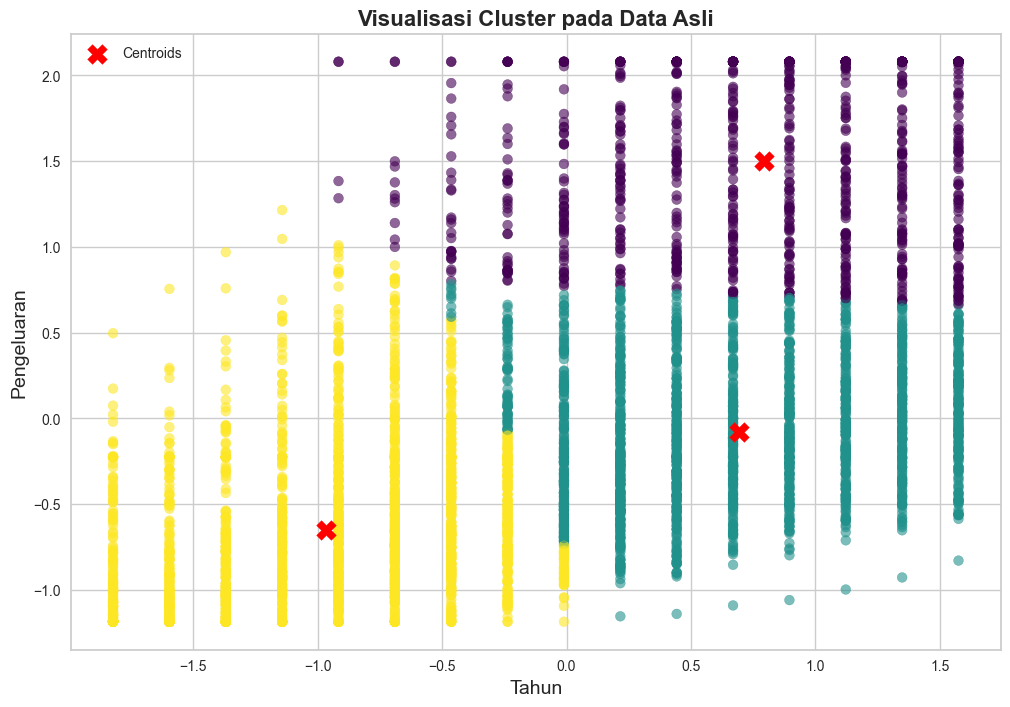

In [32]:
# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(12, 8))  # Mengatur ukuran figure

# Scatter plot untuk data asli dengan warna berdasarkan label cluster
plt.scatter(
    X[:, 0],  # Data pada sumbu x (tahun)
    X[:, 1],  # Data pada sumbu y (pengeluaran)
    c=labels,  # Warna berdasarkan label cluster
    cmap='viridis',  # Skema warna
    s=50,  # Ukuran marker
    alpha=0.6  # Transparansi marker
)

# Mendapatkan koordinat centroid dari model KMeans
centroids = kmeans_model.cluster_centers_

# Scatter plot untuk menampilkan centroid cluster
plt.scatter(
    centroids[:, 0],  # Koordinat x centroid
    centroids[:, 1],  # Koordinat y centroid
    c='red',  # Warna centroid
    s=200,  # Ukuran marker centroid
    marker='X',  # Bentuk marker centroid
    label='Centroids'  # Label untuk centroid
)

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Cluster pada Data Asli', fontsize=16, fontweight='bold')  # Judul plot
plt.xlabel('Tahun', fontsize=14)  # Label sumbu x
plt.ylabel('Pengeluaran', fontsize=14)  # Label sumbu y

# Menampilkan legenda untuk centroid
plt.legend()

# Menampilkan plot
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [33]:
# Menambahkan hasil label cluster ke dalam DataFrame df_normalized
df_normalized['cluster'] = kmeans_model.labels_  # Menyimpan label cluster hasil KMeans

# Membuat salinan dari df_normalized untuk menyimpan hasil clustering
df_original = df_normalized.copy()  # Salinan ini dapat digunakan untuk analisis lebih lanjut


In [34]:
# Inverse transform untuk data numerik (misalnya, 'tahun' dan 'pengeluaran')
df_original[['tahun', 'pengeluaran']] = scaler.inverse_transform(df_normalized[['tahun', 'pengeluaran']])

for col in categorical_columns:
    # Pastikan kolom yang di-inverse transform hanya yang asli, bukan kolom hasil clustering
    df_original[col] = encoders[col].inverse_transform(df_normalized[col])

# Pastikan kolom 'pengeluaran_kategori' ada sebelum melakukan inverse_transform
if 'pengeluaran_kategori' in df_normalized.columns:
    df_original['pengeluaran_kategori'] = label_encoder_kategori.inverse_transform(df_normalized['pengeluaran_kategori'])
else:
    print("Kolom 'pengeluaran_kategori' tidak ditemukan di df_normalized.")

In [35]:
print("Data asli setelah inverse transform:")
print(df_original.head())

Data asli setelah inverse transform:
  provinsi     daerah    jenis   tahun  pengeluaran pengeluaran_kategori  \
0     aceh  PERDESAAN  MAKANAN  2007.0     195176.0               Rendah   
1     aceh  PERDESAAN  MAKANAN  2008.0     218781.0               Rendah   
2     aceh  PERDESAAN  MAKANAN  2009.0     247427.0               Rendah   
3     aceh  PERDESAAN  MAKANAN  2010.0     275749.0               Rendah   
4     aceh  PERDESAAN  MAKANAN  2011.0     308000.0               Rendah   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
df_original[['tahun', 'pengeluaran']] = scaler.inverse_transform(df_normalized[['tahun', 'pengeluaran']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Mengelompokkan data berdasarkan kolom 'cluster' dan menghitung statistik deskriptif
# untuk fitur 'tahun' dan 'pengeluaran'
cluster_stats = df_original.groupby('cluster')[['tahun', 'pengeluaran']].agg(
    ['mean', 'median', 'std']  # Menghitung mean, median, dan standar deviasi
)

# Menampilkan hasil statistik deskriptif
print("Statistik Deskriptif per Cluster:")
print(cluster_stats)

Statistik Deskriptif per Cluster:
               tahun                     pengeluaran                          
                mean  median       std          mean     median            std
cluster                                                                       
0        2018.550656  2019.0  2.715552  1.126380e+06  1126689.0  168144.393659
1        2018.114983  2018.0  2.384488  5.731424e+05   568630.5  139688.525486
2        2010.776336  2011.0  2.265892  3.729968e+05   336764.0  162119.548853


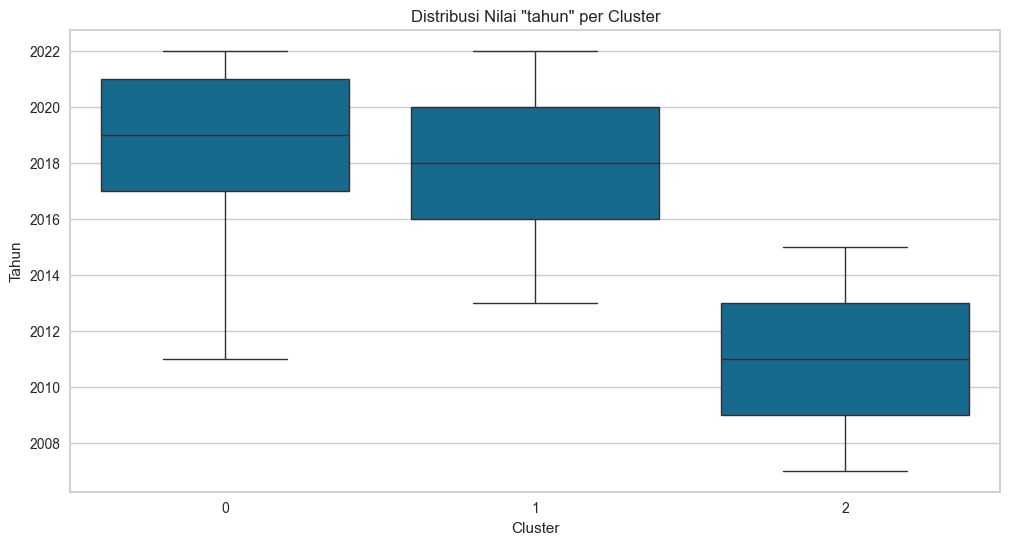

In [38]:
# Membuat boxplot untuk melihat distribusi nilai 'tahun' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cluster',
    y='tahun',
    data=df_original
)
plt.title('Distribusi Nilai "tahun" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tahun')
plt.show()

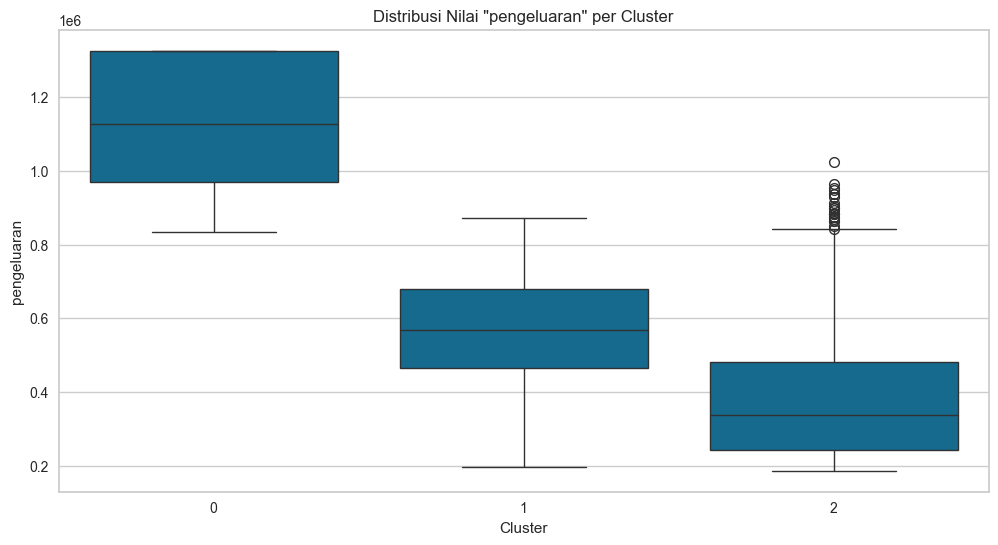

In [39]:
# Membuat boxplot untuk melihat distribusi nilai 'pengeluaran' di setiap cluster
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='cluster',
    y='pengeluaran',
    data=df_original
)
plt.title('Distribusi Nilai "pengeluaran" per Cluster')
plt.xlabel('Cluster')
plt.ylabel('pengeluaran')
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
df_original.to_csv('Dataset_Klasifikasi.csv', index=False)
print("Data telah diekspor ke 'Dataset_Klasifikasi.csv'")

Data telah diekspor ke 'Dataset_Klasifikasi.csv'
